<a href="https://colab.research.google.com/github/MM1026-DS/Handsignpredictor/blob/main/Handsign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops

In [ ]:
# tf.Session()

In [ ]:
# W  =  tf.Variable(0,dtype = tf.float32)
# loss = lambda:(W**2-10*W+25)
# opt = tf.keras.optimizers.SGD(learning_rate = 0.1)
# step_count = opt.minimize(loss,[W]).numpy()
# step_count

In [ ]:
# pt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
# var = tf.Variable(1.0)
# val0 = var.value()
# loss = lambda: (var ** 2)/2.0         # d(loss)/d(var1) = var1
# # First step is `- learning_rate * grad`
# step_count = opt.minimize(loss, [var]).numpy()
# val1 = var.value()
# (val0 - val1).numpy()

# # On later steps, step-size increases because of momentum
# step_count = opt.minimize(loss, [var]).numpy()
# val2 = var.value()
# (val1 - val2).numpy()

In [ ]:
# W = tf.Variable(0,dtype=tf.float64)
# # loss =  tf.add(W**2,tf.multiply(-10,W),25)
# loss = lambda: 2*W*W-10*W+25
# # print(loss)
# opt = tf.keras.optimizers.SGD(learning_rate=0.1)
# opt_min = opt.minimize(loss,var_list = [W])


# # train_min = train.minimize(loss,var_list =[W])
# # # # init  = tf.global
# session  =  tf.Session()
# session.run(opt_min)
# # # # session.run(init)
# # train_min.run()


In [ ]:
# opt = tf.keras.optimizers.SGD(learning_rate=0.1)
# var = tf.Variable(1.0)
# loss = lambda: (var ** 2)/2.0         # d(loss)/d(var1) = var1
# step_count = opt.minimize(loss, [var]).numpy()
# # Step is `- learning_rate * grad`
# var.numpy()

In [ ]:
# opt  = tf.keras.optimizers.SGD(learning_rate=0.1)
# W = tf.Variable(0,dtype = tf.float32)
# loss = lambda:W**2-10*W+25
# step_count = opt.minimize(loss,[W]).numpy()
# W.numpy()

In [ ]:
# import numpy as np
# import h5py

# with h5py.File("train_signs.h5","r") as f:
#  print(f)

In [ ]:
# train_dataset = h5py.File('train_signs.h5', "r")
# train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
# train_set_y_orig = np.array(train_dataset["train_set_y"][:])


## tensor flow start try to calculating loss function



In [ ]:
# y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
# y = tf.constant(39, name='y')                    # Define y. Set to 39

# loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

# tf.compat.v1.disable_eager_execution()

# init = tf.compat.v1.global_variables_initializer()

# with tf.compat.v1.Session() as sess:
#     sess.run(init)
#     print(sess.run(loss))    

## First tensor flow framework neural network


In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

In [ ]:
def load_dataset():
  train_dataset =  h5py.File("train_signs.h5","r")
  train_dataset_x_orig = np.array(train_dataset["train_set_x"][:])
  train_dataset_y_orig = np.array(train_dataset["train_set_y"][:])

  test_dataset = h5py.File("test_signs.h5","r")
  test_dataset_x_orig = np.array(test_dataset["test_set_x"][:])
  test_dataset_y_orig = np.array(test_dataset["test_set_y"][:])

  classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
  train_dataset_y_orig = train_dataset_y_orig.reshape((1, train_dataset_y_orig.shape[0]))
  test_dataset_y_orig = test_dataset_y_orig.reshape((1, test_dataset_y_orig.shape[0]))
    
  return train_dataset_x_orig, train_dataset_y_orig, test_dataset_x_orig, test_dataset_y_orig, classes

In [ ]:
train_dataset_x_orig,train_dataset_y_orig,test_dataset_x_orig,test_dataset_y_orig,classes = load_dataset()

y = 4


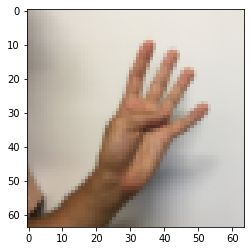

In [ ]:
plt.imshow(train_dataset_x_orig[5])
print("y = " + str(np.squeeze(train_dataset_y_orig[:,5])))

In [ ]:
y_train =  np.eye(6)[train_dataset_y_orig.reshape(-1)].T
y_test = np.eye(6)[test_dataset_y_orig.reshape(-1)].T


In [ ]:
X_train = train_dataset_x_orig.reshape(train_dataset_x_orig.shape[0],-1).T
X_test = test_dataset_x_orig.reshape(test_dataset_x_orig.shape[0],-1).T

# Normalization  
X_train =  X_train/255
X_test =  X_test/255

In [ ]:
# Creating placeholder for x,y
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder(tf.float32,[12288,None],name = "X")
y = tf.compat.v1.placeholder(tf.float32,[6,None],name = "y")


In [ ]:
def initialize_parameters():
  
  initializer_W = tf.initializers.GlorotUniform()
  initializer_b = tf.zeros_initializer()
  W1 = tf.Variable(initializer_W(shape=(25,12288)))
  b1 = tf.Variable(initializer_b(shape=(25,1)))
  W2 = tf.Variable(initializer_W(shape=(12,25)))
  b2 = tf.Variable(initializer_b(shape=(12,1)))
  W3 = tf.Variable(initializer_W(shape=(6,12)))
  b3 = tf.Variable(initializer_b(shape=(6,1)))

  parameters = {"W1":W1,
                "b1": b1,
                "W2": W2,
                "b2": b2,
                "W3": W3,
                "b3": b3}
  return parameters               



## Forward propogation in tensorflow


In [ ]:
def forward_propogation(X,parameters):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  W3 = parameters["W3"]
  b3 = parameters["b3"]

  Z1 = tf.add(tf.matmul(W1,X),b1)
  A1 = tf.nn.relu(Z1)
  Z2 = tf.add(tf.matmul(W2,A1),b2)
  A2 = tf.nn.relu(Z2)
  Z3 = tf.add(tf.matmul(W3,A2),b3)

  return Z3
   

In [ ]:
parameters = initialize_parameters()
Z3 = forward_propogation(X, parameters)
print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, None), dtype=float32)


In [ ]:
def compute_cost(Z3,y):
  logits = tf.transpose(Z3)
  labels = tf.transpose(y)

  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))

  return cost

In [ ]:
parameters = initialize_parameters()
Z3 = forward_propogation(X, parameters)
cost = compute_cost(Z3, y)
print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [ ]:
def random_mini_batches(X, y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = y[:, permutation].reshape((y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [ ]:
def model(X_train,y_train,X_test,y_test,learning_rate = 0.0001,num_epochs = 1500,minibatch_size = 32,print_cost = True):
  ops.reset_default_graph()
  (n_x,m) = X_train.shape
  n_y = y_train.shape[0]
  costs = []
  seed = 3
  X = tf.compat.v1.placeholder(tf.float32,[12288,None],name = "X")
  y = tf.compat.v1.placeholder(tf.float32,[6,None],name = "y")
  parameters = initialize_parameters()
  Z3 = forward_propogation(X,parameters)
  cost = compute_cost(Z3,y)
  optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = learning_rate,beta1=0.9,beta2=0.999).minimize(cost)
  init = tf.compat.v1.global_variables_initializer()
  with tf.compat.v1.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
      epoch_cost = 0.                       # Defines a cost related to an epoch
      num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
      seed = seed + 1
      minibatches = random_mini_batches(X_train, y_train, minibatch_size, seed)
      for minibatch in minibatches:
        (minibatch_X, minibatch_Y) = minibatch
        _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, y: minibatch_Y})
        epoch_cost += minibatch_cost / minibatch_size
      if print_cost == True and epoch % 100 == 0:
          print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
      if print_cost == True and epoch % 5 == 0:
         costs.append(epoch_cost) 
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per fives)')
    plt.title("Learning rate =" + str(learning_rate))
  
        # lets save the parameters in a variable
    parameters = sess.run(parameters)
    print ("Parameters have been trained!")

        # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(y))

        # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Train Accuracy:", accuracy.eval({X: X_train, y: y_train}))
    print ("Test Accuracy:", accuracy.eval({X: X_test, y: y_test}))
    return parameters  



Cost after epoch 0: 1.934037
Cost after epoch 100: 0.772310
Cost after epoch 200: 0.453221
Cost after epoch 300: 0.275536
Cost after epoch 400: 0.171867
Cost after epoch 500: 0.100708
Cost after epoch 600: 0.063341
Cost after epoch 700: 0.035667
Cost after epoch 800: 0.019037
Cost after epoch 900: 0.010701
Cost after epoch 1000: 0.007422
Cost after epoch 1100: 0.005850
Cost after epoch 1200: 0.003877
Cost after epoch 1300: 0.003361
Cost after epoch 1400: 0.003019
Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.875


{'W1': array([[ 0.01495723, -0.00272982, -0.01154495, ..., -0.01639206,
          0.01279509,  0.00873966],
        [ 0.00167237,  0.00657317,  0.0025011 , ..., -0.00204726,
         -0.00507197,  0.00880747],
        [-0.0024233 ,  0.00773514, -0.00463037, ..., -0.02164192,
          0.02010409,  0.00530338],
        ...,
        [ 0.0018509 , -0.00808147,  0.00144168, ...,  0.00459911,
         -0.01353942, -0.01289197],
        [ 0.00932185,  0.00730197, -0.02242354, ...,  0.01752262,
          0.00194884,  0.00566231],
        [ 0.00225539, -0.00213472,  0.00233923, ...,  0.00466313,
          0.0011887 , -0.00818407]], dtype=float32),
 'W2': array([[ 0.11824924,  0.21441238, -0.2491288 , -0.18864477,  0.31052566,
          0.4207076 ,  0.36467886, -0.61522645, -0.28402534,  0.26683277,
         -0.15217127,  0.3408755 , -0.36015505,  0.0382241 ,  0.2205745 ,
         -0.1996706 , -0.40811816,  0.255308  , -0.33462927, -0.10321791,
         -0.2939023 ,  0.1936718 ,  0.37261254,  0

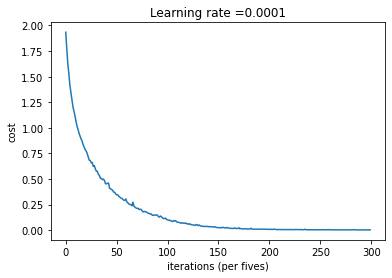

In [ ]:
model(X_train, y_train, X_test, y_test)

In [ ]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    tf.compat.v1.disable_eager_execution()
    x = tf.compat.v1.placeholder(tf.float32, [12288, None])
    
    z3 = forward_propogation(x, params)
    p = tf.argmax(z3)
    
    with tf.compat.v1.Session() as sess:
        prediction = sess.run(p, feed_dict = {x: X})
        # prediction = sess.run(p, X)
    return prediction

Tensor("Equal_6:0", shape=(None,), dtype=bool)


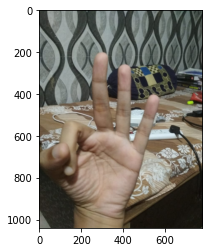

In [ ]:
from PIL import Image
img = Image.open("/content/hand2.png")
# img1 = plt.imshow(img)
arr = np.asarray(img)

my_img = Image.fromarray(arr).resize((64,64))

k = np.array(my_img).reshape((1,64*64*3)).T
k=k/255
# print(k)
z3 = forward_propogation(k,parameters)
correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(y))
print(correct_prediction)


# my_image_prediction = predict(k, parameters)

# plt.imshow(image)
# print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

    

             
# #     tf.compat.v1.disable_eager_execution()
# x = tf.compat.v1.placeholder(tf.float32, [12288, None])
# z3 = forward_propogation(x, params)
# p = tf.argmax(z3)
# print(p.shape)    
#     # with tf.Session() as sess:
#     #     prediction = sess.run(p, feed_dict = {x: X})
        
#     # return prediction
    
    

# Z1 = tf.add(tf.matmul(W1,X),b1)
# A1 = tf.nn.relu(Z1)
# Z2 = tf.add(tf.matmul(W2,A1),b2)
# A2 = tf.nn.relu(Z2)
# z3 = tf.add(tf.matmul(W3,A2),b3)

# print(z3.shape)
# print(k.shape)
# p = tf.argmax(z3)
# print(p.shape)
# with tf.compat.v1.Session() as sess:
#        sess.run(p, feed_dict={x:k})


# # correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(y))






# # k = k.reshape((1,num_px*num_px*3)).T
 
# # print(prediction(d["w"], d["b"],k))





plt.imshow(img);
